In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
adata = sc.read_h5ad('/Users/koush/Projects/SpaceOracle/data/survey/mouse_kidney_13.h5ad')
adata

AnnData object with n_obs × n_vars = 8521 × 3058
    obs: 'batch', 'rxn', 'n_counts', 'ct1', 'ct2', 'ct3', 'high_q', 'ct4', 'chip', 'exp', 'cond', 'samp-id', 'samp-type', 'medulla_cortex', 'domain', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'cell_type', 'cell_type_int', 'banksy_celltypes'
    var: 'n_counts', 'n_cells', 'mean', 'std', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'
    obsm: 'spatial'
    layers: 'imputed_count', 'normalized_count', 'raw_count'
    obsp: 'connectivities', 'distances'

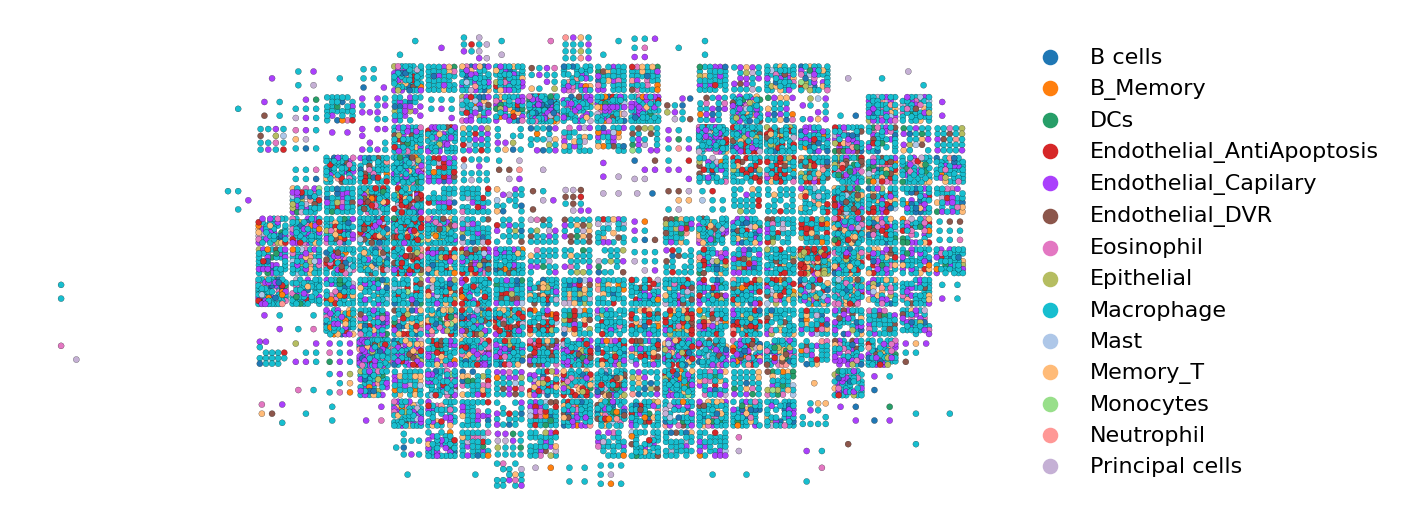

In [4]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams['figure.dpi'] = 160
sc.pl.embedding(adata, basis='spatial', color='cell_type', 
    frameon=False, edgecolor='black', s=30, linewidth=0.1, title='')


In [5]:
import sys
sys.path.append('/Users/koush/Projects/SpaceOracle/src/')

In [6]:
import celloracle as co

%matplotlib inline
plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams['figure.dpi'] = 180

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [14]:
# %%time

sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=15, use_rep='X')
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

In [8]:
adata.X.max()

7.434651

In [9]:
adata.layers["raw_count"].max()

10652.0

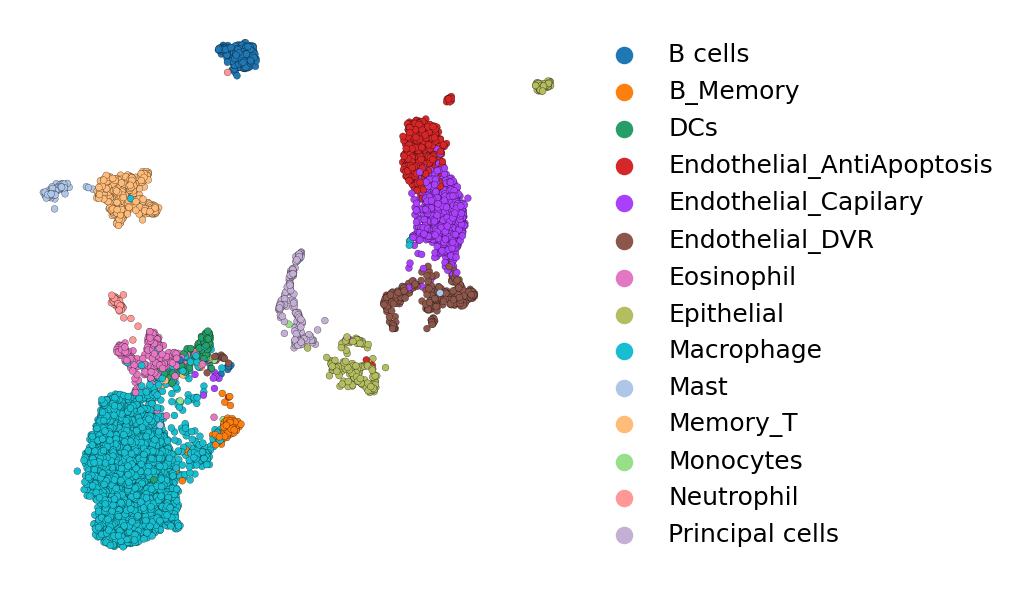

In [15]:
sc.pl.umap(adata, color='cell_type', frameon=False, edgecolor='black', s=30, linewidth=0.1, title='')

In [20]:
del adata.uns

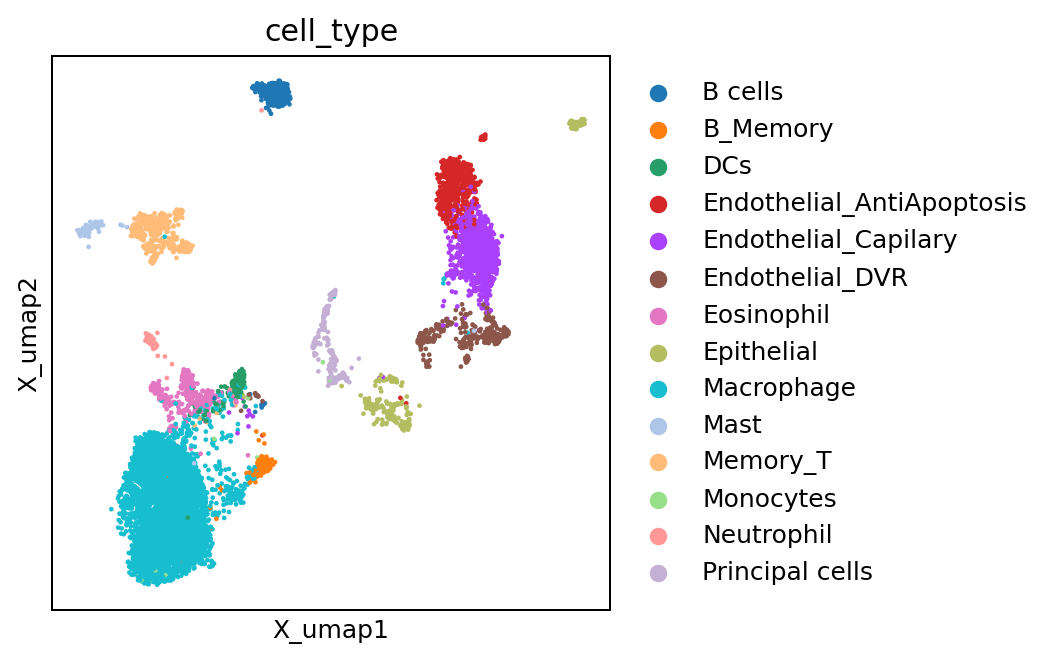

In [21]:
oracle = co.Oracle()

adata.X = adata.layers["raw_count"].copy()

oracle.import_anndata_as_raw_count(
    adata=adata,
    cluster_column_name="cell_type",
    embedding_name="X_umap"
)

oracle.pcs = [True]
oracle.k_knn_imputation = 1
oracle.knn = 1

In [22]:
base_GRN = co.data.load_mouse_promoter_base_GRN()
oracle.import_TF_data(TF_info_matrix=base_GRN)

Loading prebuilt promoter base-GRN. Version: mm10_gimmemotifsv5_fpr2


In [23]:
%%time

links = oracle.get_links(
    cluster_name_for_GRN_unit="cell_type", 
    alpha=10,
    verbose_level=2
)

  0%|          | 0/14 [00:00<?, ?it/s]

Inferring GRN for B cells...


  0%|          | 0/2989 [00:00<?, ?it/s]

  7%|▋         | 1/14 [01:35<20:41, 95.46s/it]

Inferring GRN for B_Memory...


  0%|          | 0/2989 [00:00<?, ?it/s]

 14%|█▍        | 2/14 [03:08<18:49, 94.12s/it]

Inferring GRN for DCs...


  0%|          | 0/2989 [00:00<?, ?it/s]

 21%|██▏       | 3/14 [04:42<17:12, 93.89s/it]

Inferring GRN for Endothelial_AntiApoptosis...


  0%|          | 0/2989 [00:00<?, ?it/s]

 29%|██▊       | 4/14 [06:18<15:49, 94.95s/it]

Inferring GRN for Endothelial_Capilary...


  0%|          | 0/2989 [00:00<?, ?it/s]

 36%|███▌      | 5/14 [07:58<14:29, 96.57s/it]

Inferring GRN for Endothelial_DVR...


  0%|          | 0/2989 [00:00<?, ?it/s]

 43%|████▎     | 6/14 [09:34<12:52, 96.58s/it]

Inferring GRN for Eosinophil...


  0%|          | 0/2989 [00:00<?, ?it/s]

 50%|█████     | 7/14 [11:08<11:09, 95.65s/it]

Inferring GRN for Epithelial...


  0%|          | 0/2989 [00:00<?, ?it/s]

 57%|█████▋    | 8/14 [12:42<09:29, 94.99s/it]

Inferring GRN for Macrophage...


  0%|          | 0/2989 [00:00<?, ?it/s]

 64%|██████▍   | 9/14 [14:56<08:57, 107.42s/it]

Inferring GRN for Mast...


  0%|          | 0/2989 [00:00<?, ?it/s]

 71%|███████▏  | 10/14 [16:28<06:50, 102.61s/it]

Inferring GRN for Memory_T...


  0%|          | 0/2989 [00:00<?, ?it/s]

 79%|███████▊  | 11/14 [18:03<05:00, 100.29s/it]

Inferring GRN for Monocytes...


  0%|          | 0/2989 [00:00<?, ?it/s]

 86%|████████▌ | 12/14 [19:36<03:16, 98.08s/it] 

Inferring GRN for Neutrophil...


  0%|          | 0/2989 [00:00<?, ?it/s]

 93%|█████████▎| 13/14 [21:09<01:36, 96.49s/it]

Inferring GRN for Principal cells...


  0%|          | 0/2989 [00:00<?, ?it/s]

100%|██████████| 14/14 [22:43<00:00, 97.36s/it]

CPU times: user 16min 55s, sys: 30.9 s, total: 17min 26s
Wall time: 22min 43s


In [24]:
links.filter_links()
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(
    alpha=10, 
    use_cluster_specific_TFdict=True
)

  0%|          | 0/14 [00:00<?, ?it/s]

In [26]:
import pickle

with open('/Users/koush/Desktop/training_data/mouse_kidney_13_colinks.pkl', 'wb') as f:
    pickle.dump(links.links_dict, f)

In [17]:
adata

AnnData object with n_obs × n_vars = 15836 × 3140
    obs: 'cluster', 'rctd_cluster', 'cell_type', 'cell_type_int'
    var: 'n_counts'
    uns: 'cell_type_colors', 'pca', 'neighbors', 'umap'
    obsm: 'X_spatial', 'rctd_results', 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'imputed_count', 'normalized_count', 'raw_count'
    obsp: 'distances', 'connectivities'